In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/Project SIP Exabyte/Karnataka/Karnataka(Daily).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       4018 non-null   object 
 1   temp       4017 non-null   float64
 2   humidity   4018 non-null   float64
 3   cpi        4018 non-null   float64
 4   peak_load  4018 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 157.1+ KB


In [4]:
df = data[['date','peak_load']]

In [5]:
df.head()

date  peak_load
0  2013-04-01       7191
1  2013-04-02       7652
2  2013-04-03       7620
3  2013-04-04       7557
4  2013-04-05       7540

<Axes: xlabel='date'>

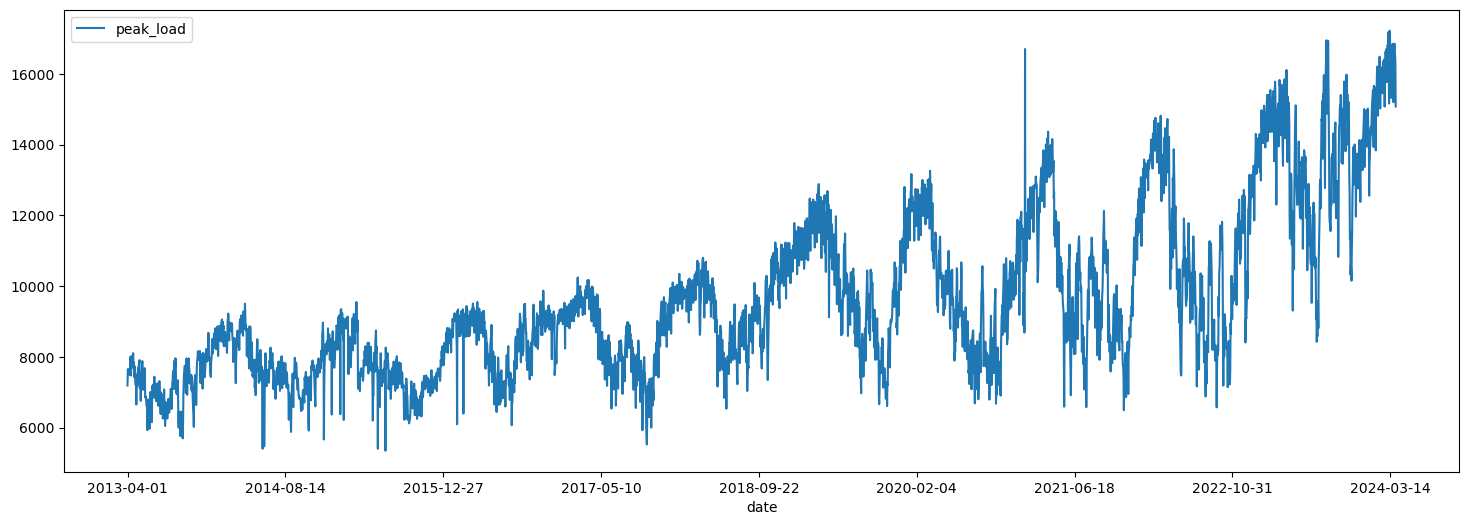

In [6]:
df.plot(x='date',y='peak_load',figsize=(18,6))

In [7]:
# Rename the columns to fit Prophet's requirements
df = df.rename(columns={'date': 'ds', 'peak_load': 'y'})


In [8]:
df.columns

Index(['ds', 'y'], dtype='object')

In [151]:
df.tail()

ds      y
4013  2024-03-27  16852
4014  2024-03-28  16525
4015  2024-03-29  16520
4016  2024-03-30  16348
4017  2024-03-31  15077

In [9]:
!pip install pandas prophet scikit-learn matplotlib

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot,plot_plotly,plot_components_plotly

Defaulting to user installation because normal site-packages is not writeable


In [127]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, shuffle=False)


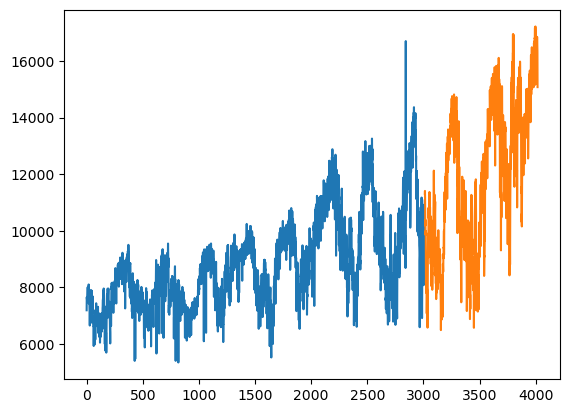

In [128]:
plt.plot(train['y'])
plt.plot(test['y'])

In [129]:
model = Prophet()
model.fit(train)

17:26:35 - cmdstanpy - INFO - Chain [1] start processing
17:26:36 - cmdstanpy - INFO - Chain [1] done processing


In [130]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [131]:
future = model.make_future_dataframe(periods=len(test), freq='D')

In [132]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()


ds          yhat   yhat_lower    yhat_upper         trend  \
4013 2024-03-27  12952.792250  9099.181565  16655.130901  11433.073873   
4014 2024-03-28  12933.844279  8904.323045  16601.492501  11434.070086   
4015 2024-03-29  12935.101337  9136.204498  16660.363078  11435.066300   
4016 2024-03-30  12962.377822  9106.118292  16937.588399  11436.062513   
4017 2024-03-31  12714.413272  8937.019417  16663.687542  11437.058726   

      trend_lower   trend_upper  
4013  7720.070884  15110.283440  
4014  7716.633713  15116.297392  
4015  7713.196543  15127.647836  
4016  7709.803987  15138.998280  
4017  7707.000628  15149.535565

In [133]:
forecast = model.predict(future)
# Extract only the predictions for the test period
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test):].reset_index(drop=True)
test = test.reset_index(drop=True)



In [134]:
# Combine the actual values and predicted values
results = pd.concat([test, forecast_test['yhat']], axis=1)
results = results.rename(columns={'yhat': 'predicted'})


## Accuracy Metrics

In [135]:
# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(results['y'], results['predicted'])
mse = mean_squared_error(results['y'], results['predicted'])
rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(results['y'], results['predicted'])
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape * 100}%')  # Convert MAPE to percentage
print(f'Accuracy: {100 - (mape *100)}%')


MAE: 1869.7042739983708
MSE: 5056083.359386672
RMSE: 2248.573627744191
MAPE: 15.178896736757949%
Accuracy: 84.82110326324205%


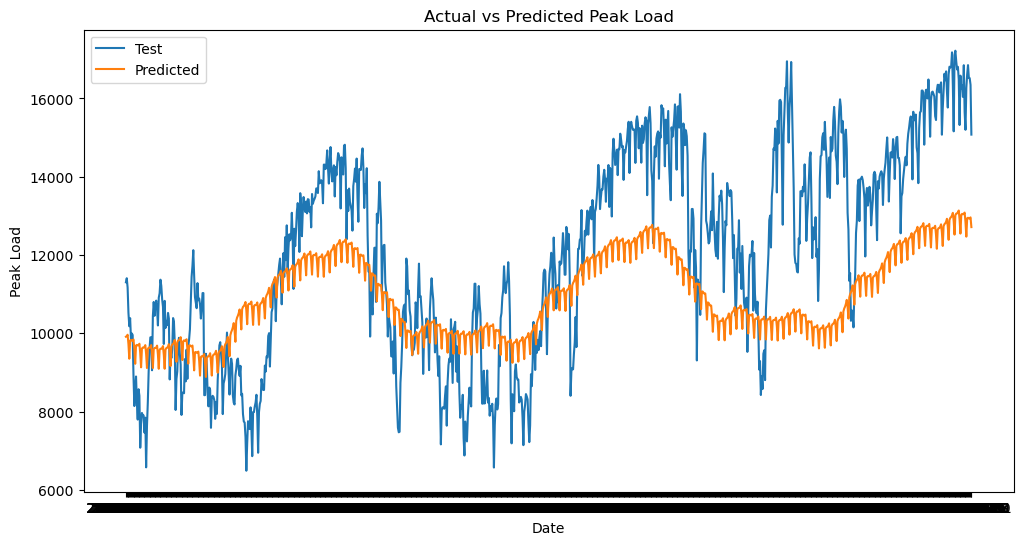

In [136]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['y'], label='Test')
plt.plot(results['ds'], results['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Peak Load')
plt.title('Actual vs Predicted Peak Load')
plt.legend()
plt.show()

In [137]:
plot_plotly(model ,forecast)

In [138]:
plot_components_plotly(model, forecast)

## Forecasting of Unknown Peak Load based on Training data and Forecasted for period upto  2025

In [139]:
train.tail()

ds      y
3008  2021-06-26  10925
3009  2021-06-27   8500
3010  2021-06-28  10093
3011  2021-06-29  10660
3012  2021-06-30  11071

In [140]:
model = Prophet()
model.fit(train)

17:28:25 - cmdstanpy - INFO - Chain [1] start processing
17:28:26 - cmdstanpy - INFO - Chain [1] done processing


In [181]:
future_unknown = model.make_future_dataframe(periods=180*7,
                                            freq='D')



In [182]:
forecast_unknown = model.predict(future_unknown)
forecast_unknown[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

ds          yhat   yhat_lower    yhat_upper         trend  \
4268 2024-12-07  11911.731522  6703.724340  17236.756518  11687.108236   
4269 2024-12-08  11701.837697  6388.665308  17053.539619  11688.104449   
4270 2024-12-09  11364.338559  6251.158007  16734.736130  11689.100662   
4271 2024-12-10  11872.983195  6728.870871  16909.266845  11690.096875   
4272 2024-12-11  11932.748637  6746.765886  17348.227854  11691.093088   

      trend_lower   trend_upper  
4268  6649.791892  16744.294079  
4269  6643.032580  16751.721374  
4270  6636.681857  16759.148670  
4271  6630.331135  16765.348557  
4272  6623.980413  16770.092308

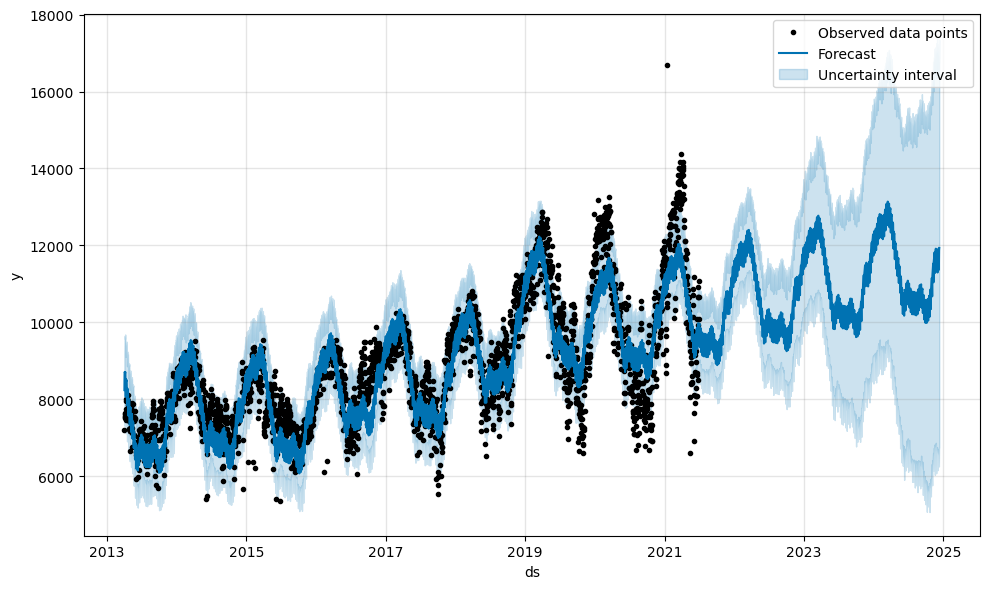

In [183]:
fig1 = model.plot(forecast_unknown, include_legend=True)

In [184]:
plot_plotly(model ,forecast_unknown)

In [185]:
plot_components_plotly(model, forecast_unknown)

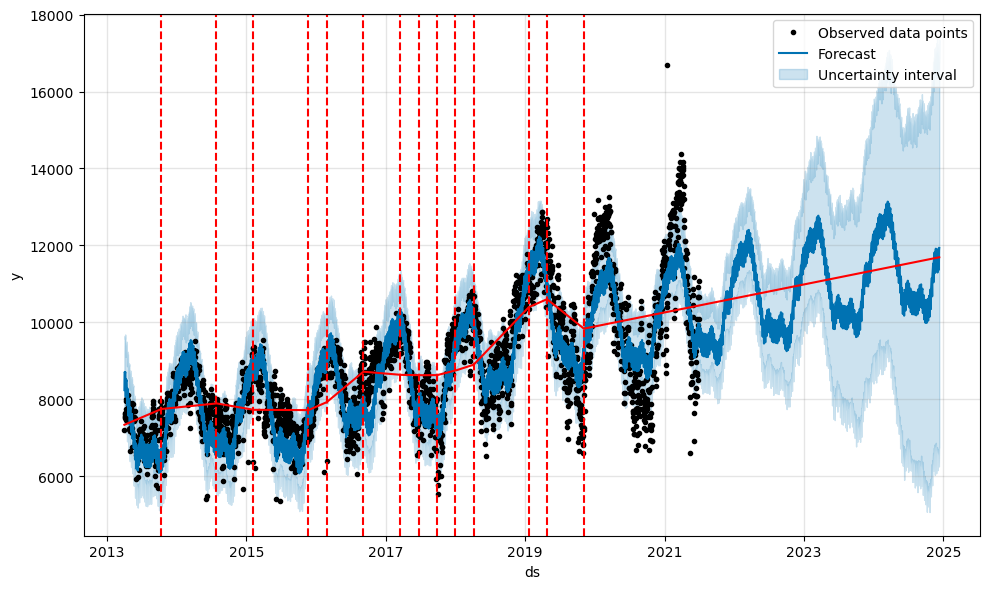

In [186]:
fig = model.plot(forecast_unknown,include_legend=True)
a = add_changepoints_to_plot(fig.gca(),
                             model, forecast_unknown)

## Add changepoints to indicate the time in rapid trend growths. The dotted red lines show the time when there was a rapid change in the trend of the Peak Load.

In [188]:
results.to_excel("actual vs. predicted (Karnataka).xlsx",index=False)

In [189]:
forecast_unknown.to_excel('Forecasting of Karnataka.xlsx',index=False)